In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.ticker as ticker
import seaborn as sns
from collections import Counter

In [2]:
filepath = "KaggleData/student-mat.csv"
df = pd.read_csv(filepath)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Dalc

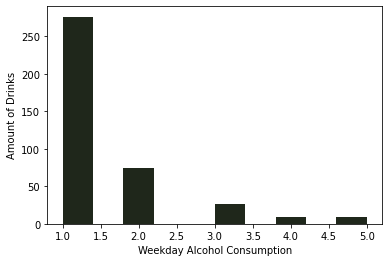

1.481012658227848
1.0
0    1
dtype: int64


In [4]:
plt.hist(df['Dalc'], color="#1F271B")
plt.xlabel('Weekday Alcohol Consumption')
plt.ylabel('Amount of Drinks')
plt.show()
print(df['Dalc'].mean())
print(df['Dalc'].median())
print(df['Dalc'].mode())

In [5]:
print(df['absences'].mean())
print(df['absences'].median())
print(df['absences'].mode())

5.708860759493671
4.0
0    0
dtype: int64


## School Support

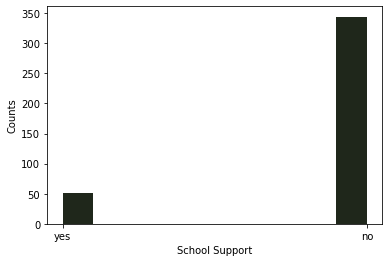

In [6]:
plt.hist(df['schoolsup'], color="#1F271B")
plt.xlabel('School Support')
plt.ylabel('Counts')
plt.show()

In [7]:
schoolSup_df = df.loc[(df["schoolsup"] == "yes"), [
    "Dalc", "Walc", "health", "absences"]]
schoolSup_df.head()



,Dalc,Walc,health,absences
0,1,1,3,6
2,2,3,3,10
7,1,1,1,6
17,1,1,4,4
24,1,1,5,2


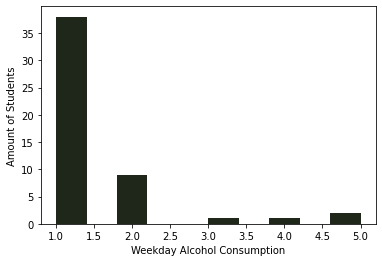

1.4313725490196079
1.0
6.176470588235294
4.0
0    2
dtype: int64


In [8]:
plt.hist(schoolSup_df['Dalc'], color="#1F271B")
plt.xlabel('Weekday Alcohol Consumption')
plt.ylabel('Amount of Students')
plt.show()
print(schoolSup_df['Dalc'].mean())
print(schoolSup_df['Dalc'].median())

print(schoolSup_df['absences'].mean())
print(schoolSup_df['absences'].median())
print(schoolSup_df['absences'].mode())

## Family Support

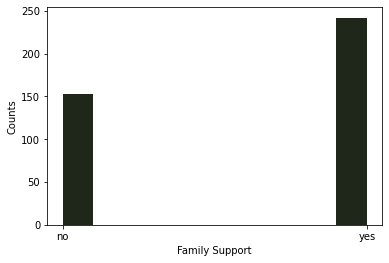

In [9]:
plt.hist(df['famsup'], color="#1F271B")
plt.xlabel('Family Support')
plt.ylabel('Counts')
plt.show()

In [10]:
famSup_df = df.loc[(df["famsup"] == "yes"), [
    "Dalc", "Walc", "health", "absences"]]
famSup_df.head()

,Dalc,Walc,health,absences
1,1,1,3,4
3,1,1,5,2
4,1,2,5,4
5,1,2,5,10
7,1,1,1,6


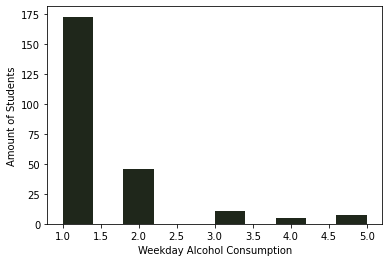

1.4586776859504131
1.0
5.863636363636363
4.0


In [11]:
plt.hist(famSup_df['Dalc'], color="#1F271B")
plt.xlabel('Weekday Alcohol Consumption')
plt.ylabel('Amount of Students')
plt.show()
print(famSup_df['Dalc'].mean())
print(famSup_df['Dalc'].median())

print(famSup_df['absences'].mean())
print(famSup_df['absences'].median())

## Study Time

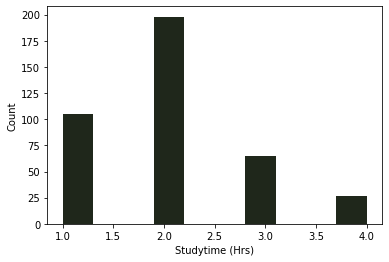

1.481012658227848
1.0


In [12]:
plt.hist(df['studytime'], color="#1F271B")
plt.xlabel('Studytime (Hrs)')
plt.ylabel('Count')
plt.show()
print(df['Dalc'].mean())
print(df['Dalc'].median())

In [13]:
df.studytime.value_counts()

2    198
1    105
3     65
4     27
Name: studytime, dtype: int64

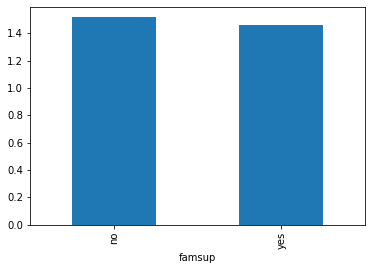

In [14]:
famBardf = df.groupby(by="famsup")["Dalc"].mean()

famBardf.plot.bar()


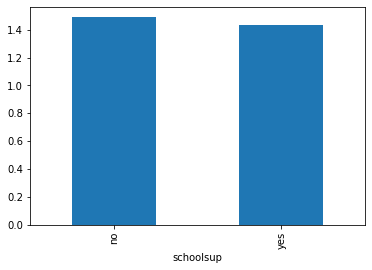

In [15]:
schoolBar = df.groupby(by="schoolsup")["Dalc"].mean()
schoolBar.plot.bar()

In [16]:
dalcstudy = []
studytimes = [1, 2, 3, 4]
for hour in studytimes:
    new_df = df.loc[(df["studytime"] == hour), [
    "Dalc", "Walc", "health", "absences"]]
    hourandAlcohol = new_df['Dalc'].mean()
    dalcstudy.append(hourandAlcohol)
    
dalcstudy

[1.7619047619047619, 1.4494949494949494, 1.2, 1.2962962962962963]

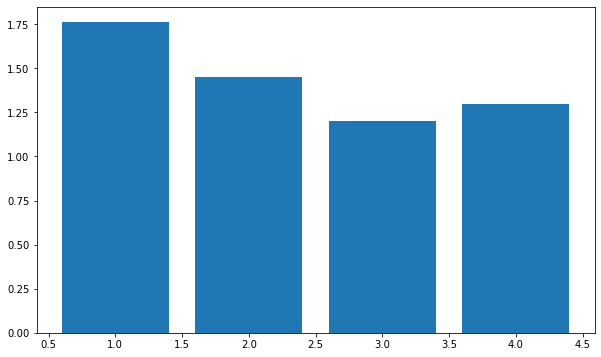

In [17]:
plt.figure(figsize = (10,6))
plt.bar(studytimes, dalcstudy)
plt.show()

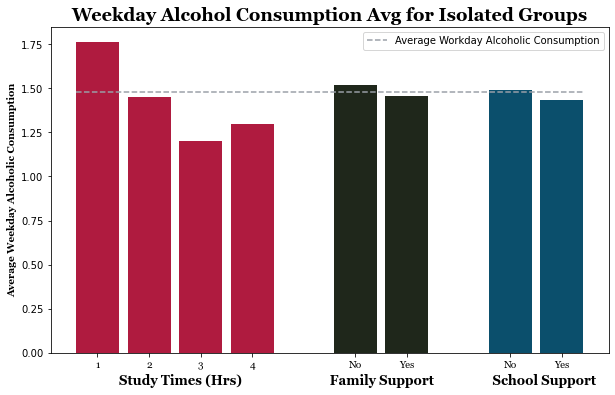

In [31]:
plt.figure(figsize = (10,6))
barWidth = .25

r1 = [0, .6, 1.2, 1.8]
r2 = [3, 3.6]
r3 = [4.8, 5.4]

r4 = [-.25, 5.65]
r5 = [1.481, 1.481]

plt.bar(r1, dalcstudy, width = .5, color = "#AF1B3F")
plt.bar(r2, df.groupby(by="famsup")["Dalc"].mean(), width = .5, color = "#1F271B")
plt.bar(r3, df.groupby(by="schoolsup")["Dalc"].mean(), width = .5, color = "#0B4F6C")

plt.plot(r4, r5,"--", color = "#9AA0A8", label='Average Workday Alcoholic Consumption')

plt.xticks([0, .6, 1.2, 1.8, 3, 3.6, 4.8, 5.4], ['1', '2', '3', '4', 'No', 'Yes', 'No', 'Yes'], fontname = "Georgia")
plt.xlabel('Study Times (Hrs)                           Family Support                  School Support', fontname = "Georgia", fontsize = 13, fontweight = 'bold', position=(.55,0.1))
plt.ylabel('Average Weekday Alcoholic Consumption', fontname = "Georgia", fontweight = 'bold')
plt.title("Weekday Alcohol Consumption Avg for Isolated Groups", fontweight = "bold", fontname = "Georgia", fontsize = 18)

#plt.ylim(1,2)

plt.legend()
plt.show()